In [1]:
#imports
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

NUM_PIXELS = 784
IMAGE_ROW = 28
IMAGE_COL = 28

## TASK 1 : Feature extraction and normalization

In [2]:
#loading train and test data
train_data = scipy.io.loadmat('train_data.mat')
test_data = scipy.io.loadmat('test_data.mat')
train_label = train_data['label']
test_label = test_data['label']
print(train_label.shape)

(1, 11548)


In [3]:
#verifying dimensions of test and train data
_, total_train_images = train_data['label'].shape
print(train_data['data'].shape)
_, total_test_images = test_data['label'].shape
print(total_train_images)

(11548, 28, 28)
11548


In [4]:
#reshaping the data
train_data = np.reshape(train_data['data'], (total_train_images, NUM_PIXELS) )
test_data = np.reshape(test_data['data'], (total_test_images, NUM_PIXELS))

In [5]:
#verifying shape of the matrices
print(train_data.shape)
print(test_data.shape)

(11548, 784)
(2886, 784)


In [6]:
#Mean and standard deviation for each image
mean_vec_train = train_data.mean(axis=1)
std_vec_train = train_data.std(axis=1)
mean_vec_test = test_data.mean(axis=1)
std_vec_test = test_data.std(axis=1)

In [7]:
#Computing mean and standard deviation of new features
#train data
mean_mean_vec = mean_vec_train.mean()
std_mean_vec = mean_vec_train.std()
mean_std_vec = std_vec_train.mean()
std_std_vec = std_vec_train.std()
#test data
mean_mean_vec_test = mean_vec_test.mean()
std_mean_vec_test = mean_vec_test.std()
mean_std_vec_test = std_vec_test.mean()
std_std_vec_test = std_vec_test.std()

In [8]:
print("Mean and standard deviation of feature 1 (Mean of all pixels in each image) for training data is :", (mean_mean_vec, std_mean_vec))
print("Mean and standard deviation of feature 2 (Standard Deviation of all pixels in each image) for training data is :", (mean_std_vec, std_std_vec))
print("Mean and standard deviation of feature 1 (Mean of all pixels in each image) for testing data is :", (mean_mean_vec_test, std_mean_vec_test))
print("Mean and standard deviation of feature 2 (Standard Deviation of all pixels in each image) for testing data is :", (mean_std_vec_test, std_std_vec_test))

Mean and standard deviation of feature 1 (Mean of all pixels in each image) for training data is : (32.50435107148159, 9.349449452973936)
Mean and standard deviation of feature 2 (Standard Deviation of all pixels in each image) for training data is : (76.44042397326842, 10.509725393032216)
Mean and standard deviation of feature 1 (Mean of all pixels in each image) for testing data is : (33.23068083782369, 9.807076720815555)
Mean and standard deviation of feature 2 (Standard Deviation of all pixels in each image) for testing data is : (77.1949417103036, 10.874661388710518)


In [9]:
#M1, S1 and M2, S2 calcualtions for new features
mean_vec_train = np.reshape(mean_vec_train, (-1, 1))
std_vec_train = np.reshape(std_vec_train, (-1, 1))
mean_vec_test = np.reshape(mean_vec_test, (-1, 1))
std_vec_test = np.reshape(std_vec_test, (-1,1))

In [10]:
mean_vec_train.shape


(11548, 1)

In [11]:
#normalizing the mean feature for train data using M1 and S1
normalized_mean_vec_train = np.apply_along_axis(lambda x: (x - mean_mean_vec)/std_mean_vec, axis=0, arr = mean_vec_train)

In [12]:
normalized_mean_vec_train

array([[ 0.15069489],
       [-0.97386658],
       [-0.60346935],
       ...,
       [-0.80933654],
       [-0.42215888],
       [ 0.14114505]])

In [13]:
#normalizing the standard deviation feature for train data using M2 and S2
normalized_std_vec_train = np.apply_along_axis(lambda x: (x - mean_std_vec)/std_std_vec, axis=0, arr = std_vec_train)
normalized_std_vec_train

array([[ 0.12996069],
       [-0.93473171],
       [-0.6292426 ],
       ...,
       [-0.83222958],
       [-0.31853427],
       [ 0.41329776]])

In [14]:
#normalizing test data
normalized_mean_vec_test = np.apply_along_axis(lambda x: (x - mean_mean_vec_test)/std_mean_vec_test, axis=0, arr = mean_vec_test)
normalized_std_vec_test = np.apply_along_axis(lambda x: (x - mean_std_vec_test)/std_std_vec_test, axis=0, arr = std_vec_test)

In [15]:
#concatenating the individual features to get test and train data
train_data_normalized = np.concatenate((normalized_mean_vec_train, normalized_std_vec_train), axis=1)
train_data_normalized = np.concatenate((train_data_normalized, train_label.T), axis=1)
test_data_normalized = np.concatenate((normalized_mean_vec_test, normalized_std_vec_test), axis=1)
test_data_normalized = np.concatenate((test_data_normalized, test_label.T), axis=1)

## TASK 2 : Density Estimation

In [16]:
#getting data class wise
#train
train_data_3 = train_data_normalized[np.where(train_data_normalized[:,2]==3)]
print(train_data_3.shape)
train_data_3 = train_data_3[:,:2]

#test
test_data_3 = test_data_normalized[np.where(test_data_normalized[:,2]==3)]
print(test_data_3.shape)
test_data_3 = test_data_3[:,:2]

(5713, 3)
(1428, 3)


In [17]:
#train
train_data_7 = train_data_normalized[np.where(train_data_normalized[:,2]==7)]
train_data_7 = train_data_7[:,:2]

#test
test_data_7 = test_data_normalized[np.where(test_data_normalized[:,2]==7)]
test_data_7 = test_data_7[:,:2]
print(test_data_7.shape)

(1458, 2)


In [18]:
#Density estimation for class 3
mean_3 = train_data_3.mean(axis=0)
cov_3 = np.cov(train_data_3.T)
print("Mean and covariance for density estimation for class 3 are:\n", (mean_3, cov_3))
density_est_3 = multivariate_normal(mean_3, cov_3)

Mean and covariance for density estimation for class 3 are:
 (array([0.37687996, 0.31851855]), array([[1.04928927, 0.98734647],
       [0.98734647, 0.96054796]]))


In [19]:
#Plotting the density function
def plot_bivariate_normal_pdf(x, y, z):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, linewidth=0, rstride=3, cstride=3, antialiased=True, cmap=cm.viridis)

    #cset = ax.contourf(x, y, z, zdir='z', offset=-0.15, cmap=cm.viridis)
    plt.show()

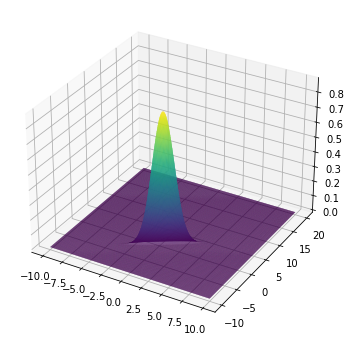

In [20]:
#PDF plot for class 3
x, y = np.mgrid[-10:10:.01, -10:20:.01]
pos = np.dstack((x, y))
plot_bivariate_normal_pdf(x, y, density_est_3.pdf(pos))

In [21]:
#Density estimate for class 7
mean_7 = train_data_7.mean(axis=0)
cov_7 = np.cov(train_data_7.T)
print("Mean and covariance for density estimation for class 7 are:\n", (mean_7, cov_7))
density_est_7 = multivariate_normal(mean_7, cov_7)

Mean and covariance for density estimation for class 7 are:
 (array([-0.36900004, -0.31185886]), array([[0.67680735, 0.74448378],
       [0.74448378, 0.84234736]]))


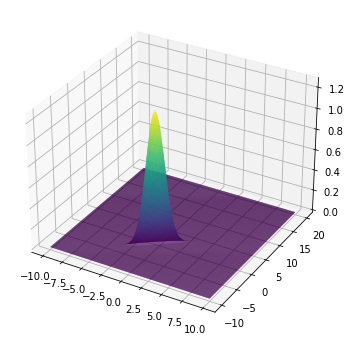

In [22]:
plot_bivariate_normal_pdf(x, y, density_est_7.pdf(pos))

## TASK 3: Bayesian Decision Theory for optimal classification

In [23]:
#Maximum-error-rate classification
def probability_error(data, prior_3, prior_7):
    prob3 = prior_3*density_est_3.pdf(data)
    prob7 = prior_7*density_est_7.pdf(data)
    #px = prob3 + prob7
    return min(prob3, prob7)

def predict(data, prior_3, prior_7):
    prob3 = prior_3*density_est_3.pdf(data)
    prob7 = prior_7*density_est_7.pdf(data)
    if prob3 > prob7:
        return 3
    else:
        return 7


### CASE 1

In [24]:
prior_3 = 0.5
prior_7 = 0.5
prob_error_train = []
pred_train_3 = []
pred_train_7 = []
prob_error_test = []
pred_test_3 = []
pred_test_7 = []
for i in range(len(train_data_normalized)):
    prob_error_train.append(probability_error(train_data_normalized[i,:2], prior_3, prior_7))

for i in range(len(train_data_3)):
    pred_train_3.append(predict(train_data_3[i], prior_3, prior_7))

for i in range(len(train_data_7)):
    pred_train_7.append(predict(train_data_7[i], prior_3, prior_7))
    
for i in range(len(test_data_normalized)):
    prob_error_test.append(probability_error(test_data_normalized[i,:2], prior_3, prior_7))
    
for i in range(len(test_data_3)):    
    pred_test_3.append(predict(test_data_3[i], prior_3, prior_7))

for i in range(len(test_data_7)):
    pred_test_7.append(predict(test_data_7[i], prior_3, prior_7))

In [25]:
avg_prob_error_train = sum(prob_error_train)/len(train_data_normalized)
print("avg probability of error for training data is %s" %avg_prob_error_train )

avg probability of error for training data is 0.15844362462326067


In [26]:
avg_prob_error_test = sum(prob_error_test)/len(test_data_normalized)
print("avg probability of error for test data is %s" %avg_prob_error_test)

avg probability of error for test data is 0.15900232343548618


In [27]:
correct_pred_train = 0
for i in range(len(train_data_3)):
    if pred_train_3[i] == 3:
        correct_pred_train += 1
for i in range(len(train_data_7)):
    if pred_train_7[i] == 7:
        correct_pred_train += 1
        
train_accuracy = correct_pred_train/total_train_images
train_accuracy

0.7015933494977485

In [28]:
correct_pred_test = 0
for i in range(len(pred_test_3)):
    if pred_test_3[i] == 3:
        correct_pred_test += 1
for i in range(len(pred_test_7)):
    if pred_test_7[i] == 7:
        correct_pred_test += 1

test_accuracy = correct_pred_test/total_test_images
test_accuracy

0.6985446985446986

### CASE 2

In [29]:
prior_3 = 0.3
prior_7 = 0.7
prob_error_train = []
pred_train_3 = []
pred_train_7 = []
prob_error_test = []
pred_test_3 = []
pred_test_7 = []
for i in range(len(train_data_normalized)):
    prob_error_train.append(probability_error(train_data_normalized[i,:2], prior_3, prior_7))

for i in range(len(train_data_3)):
    pred_train_3.append(predict(train_data_3[i], prior_3, prior_7))

for i in range(len(train_data_7)):
    pred_train_7.append(predict(train_data_7[i], prior_3, prior_7))
    
for i in range(len(test_data_normalized)):
    prob_error_test.append(probability_error(test_data_normalized[i,:2], prior_3, prior_7))
    
for i in range(len(test_data_3)):    
    pred_test_3.append(predict(test_data_3[i], prior_3, prior_7))

for i in range(len(test_data_7)):
    pred_test_7.append(predict(test_data_7[i], prior_3, prior_7))
    
avg_prob_error_train = sum(prob_error_train)/len(train_data_normalized)
print("avg probability of error for training data is %s" %avg_prob_error_train )

avg_prob_error_test = sum(prob_error_test)/len(test_data_normalized)
print("avg probability of error for test data is %s" %avg_prob_error_test)

correct_pred_train = 0
for i in range(len(train_data_3)):
    if pred_train_3[i] == 3:
        correct_pred_train += 1
for i in range(len(train_data_7)):
    if pred_train_7[i] == 7:
        correct_pred_train += 1
        
train_accuracy = correct_pred_train/total_train_images
train_accuracy

avg probability of error for training data is 0.10537836493354835
avg probability of error for test data is 0.10539933038676554


0.6582958087980603

In [30]:
correct_pred_test = 0
for i in range(len(pred_test_3)):
    if pred_test_3[i] == 3:
        correct_pred_test += 1
for i in range(len(pred_test_7)):
    if pred_test_7[i] == 7:
        correct_pred_test += 1

test_accuracy = correct_pred_test/total_test_images
test_accuracy

0.6507276507276507